# Importing Libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Importing Data Base

In [3]:
# Import ords_prods_merge dataframe
# Create a string of the path
# Define the path variable
path=r'/Users/douniaelyoussoufi/Achievement 4 '
# Load the ords_prods_merge.pkl file directly using os.path.join
merged_data = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'merged_data_part1.pkl'))

# Exercise 4.9

## Step 2

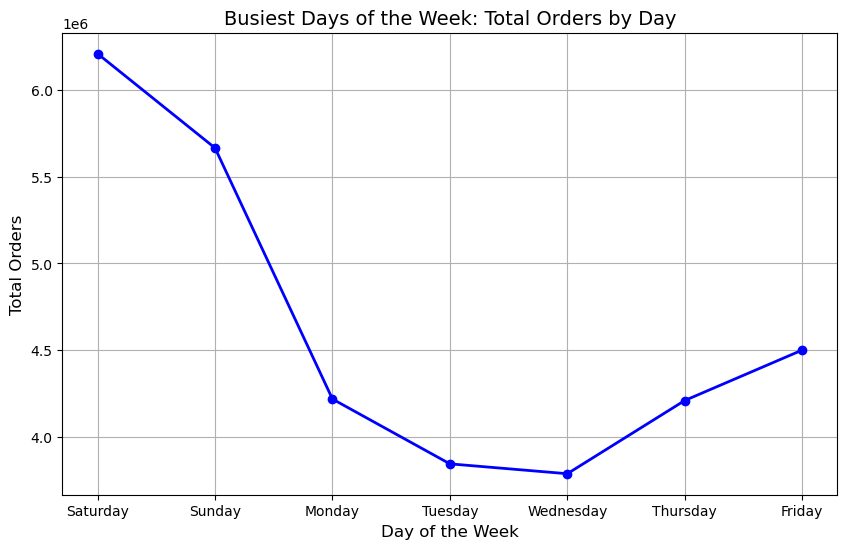

In [17]:
# Count orders by day of the week
orders_by_day = merged_data['order_dow'].value_counts().sort_index()

# Map day numbers to day names if necessary
day_mapping = {0: 'Saturday', 1: 'Sunday', 2: 'Monday', 3: 'Tuesday', 4: 'Wednesday', 5: 'Thursday', 6: 'Friday'}
orders_by_day.index = orders_by_day.index.map(day_mapping)

# Create line chart
plt.figure(figsize=(10, 6))
orders_by_day.plot(kind='line', marker='o', color='b', linestyle='-', linewidth=2, markersize=6)

# Title and labels
plt.title('Busiest Days of the Week: Total Orders by Day', fontsize=14)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Total Orders', fontsize=12)
save_filepath = os.path.join(path, '04 Analysis', 'Visualizations','busiest_days_week.png')
plt.savefig(save_filepath)
# Display the plot
plt.grid(True)
plt.show()

<Axes: xlabel='order_dow'>

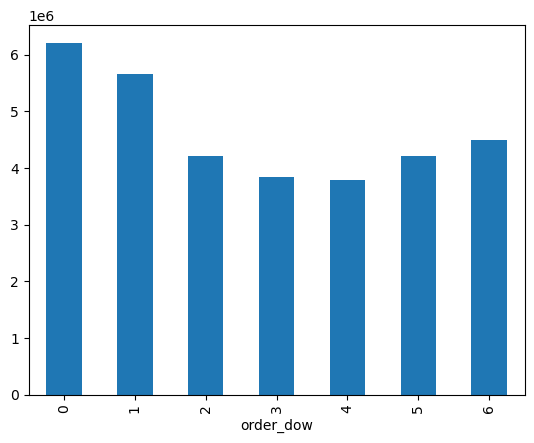

In [16]:
# Create a bar chart showing the distribution of orders by day of the week
# sorted in ascending order, and then plotted as a bar chart
merged_data['order_dow'].value_counts().sort_index().plot.bar()

<Axes: ylabel='Frequency'>

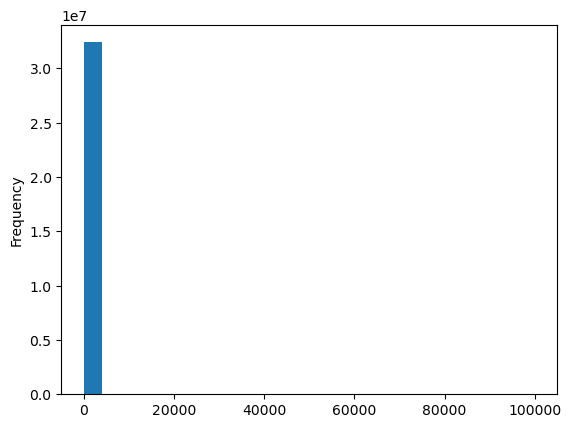

In [18]:
# Create a histogram to visualize the distribution of prices
# The 'prices' column is plotted as a histogram with 25 bins to show the frequency distribution of price values.
merged_data['prices'].plot.hist(bins=25)

<Axes: xlabel='order_id', ylabel='prices'>

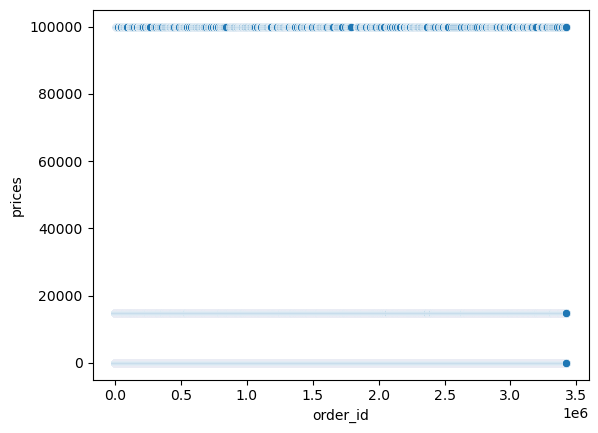

In [20]:
# Create a scatter plot to visualize potential outliers in the 'prices' column
# This will help in identifying points that deviate from the overall pattern.
sns.scatterplot(x='order_id', y='prices', data=merged_data)

In [21]:
# Filter the data to identify rows where the 'prices' column is greater than 100
# This helps to identify potential outliers or extreme values in the 'prices' column.
merged_data.loc[merged_data['prices'] > 100, 'prices']

347         14900.0
9187        14900.0
10809       14900.0
11158       14900.0
11780       14900.0
             ...   
32429984    14900.0
32430527    14900.0
32431189    14900.0
32432672    14900.0
32434790    99999.0
Name: prices, Length: 5127, dtype: float64

In [23]:
# Replace 'prices' values greater than 100 with NaN
# This step addresses the outliers by assigning NaN (missing values) to 'prices' greater than 100, 
# effectively removing these extreme values from the analysis.
merged_data.loc[merged_data['prices'] > 100, 'prices'] = np.nan

In [25]:
# Get the maximum value in the 'prices' column
# This step helps to confirm that there are no remaining extreme values after handling the outliers.
merged_data['prices'].max()

25.0

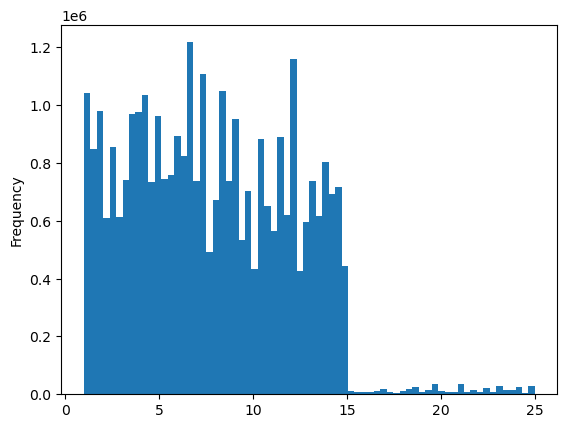

In [27]:
# Create a histogram to visualize the distribution of 'prices' with 70 bins
# This helps to see the overall distribution of prices in the dataset, 
# and is especially useful after cleaning the data to observe the impact of handling outliers.
hist = merged_data['prices'].plot.hist(bins=70)

In [40]:
# Save the histogram plot as a PNG image
# The 'hist' object, which contains the plot, is saved to a file named 'bar_orders_dow.png'
# The file is saved in the 'Visualizations' folder within the '04 Analysis' directory at the specified path.
hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_orders_dow.png'))

In [44]:
# Set the random seed to ensure reproducibility of the random split
# This guarantees that the same random values are generated each time the code is run.
np.random.seed(4)
# Generate a random array (dev) with the same length as merged_data
# Each value is True with a 70% chance and False with a 30% chance
# This will be used to split the data into two sets: 'big' and 'small'.
dev = np.random.rand(len(merged_data)) <= 0.7

In [46]:
# Create a 'big' DataFrame that contains the rows where 'dev' is True (70% of the data)
big = merged_data[dev]
# Create a 'small' DataFrame that contains the rows where 'dev' is False (30% of the data)
small = merged_data[~dev]

In [49]:
# Print the length of the entire 'merged_data' DataFrame
# This shows the total number of rows in the original dataset.
len(merged_data)

32435059

In [51]:
# Print the sum of the lengths of 'big' and 'small' to confirm they add up to the length of 'merged_data'
# This checks that the data has been correctly split.
len(big) + len(small)

32435059

In [53]:
# Create a new DataFrame (df_2) with only the 'order_dow' and 'prices' columns from the 'small' DataFrame
df_2 = small[['order_dow', 'prices']]

[Text(0.5, 1.0, 'Relationship Between Day of the Week and Prices'),
 Text(0.5, 0, 'Day of the Week'),
 Text(0, 0.5, 'Prices')]

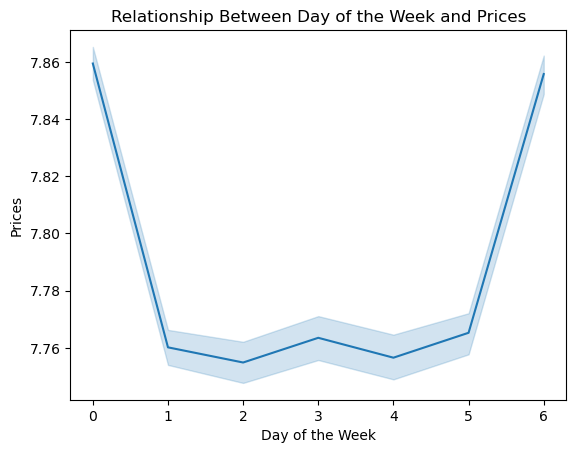

In [113]:
# Create a line plot using Seaborn to visualize the relationship between 'order_dow' (day of the week) and 'prices'
# The x-axis represents the day of the week ('order_dow') and the y-axis represents the prices.
line = sns.lineplot(data=df_2, x='order_dow', y='prices')
line.set(title='Relationship Between Day of the Week and Prices', xlabel='Day of the Week', ylabel='Prices')

In [116]:
# Save the line chart as a PNG image
# The file is saved in the 'Visualizations' folder within the '04 Analysis' directory at the specified path.
line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_order_dow_prices.png'))

## Step 3

[Text(0.5, 1.0, 'Order Hours Distribution'),
 Text(0.5, 0, 'Hour of Day'),
 Text(0, 0.5, 'Number of Orders')]

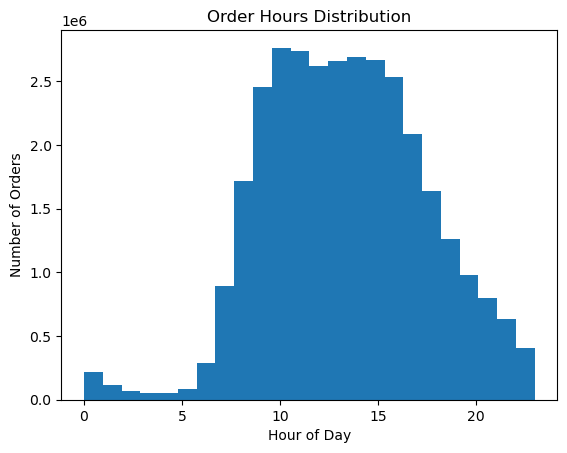

In [108]:
# Create a histogram to visualize the distribution of the 'order_hour_of_day' column
# This will show how orders are distributed throughout the day.
hist2 = merged_data['order_hour_of_day'].plot.hist(bins=24)
hist2.set(title='Order Hours Distribution', xlabel='Hour of Day', ylabel='Number of Orders')

### Findings on Order Hours Distribution

The histogram of the 'order_hour_of_day' column demonstrates how customer orders are distributed across the 24 hours of the day. From the histogram, we observe that the peak order time occurs at 10 AM, indicating the highest order frequency during this hour. Orders start to increase at 8 AM, reach a high at 10 AM, and then gradually decline after 4 PM. The number of orders continues to decrease until the late hours of the day, with the lowest activity observed around midnight (12 AM) to 4 AM. This pattern suggests a typical daily cycle in customer ordering behavior, with peak activity during the morning and a steady decline as the day progresses.

In [111]:
# Save the histogram as a PNG image
# The file is saved in the 'Visualizations' folder within the '04 Analysis' directory at the specified path.
hist2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_order_hour.png'))

## Step 4

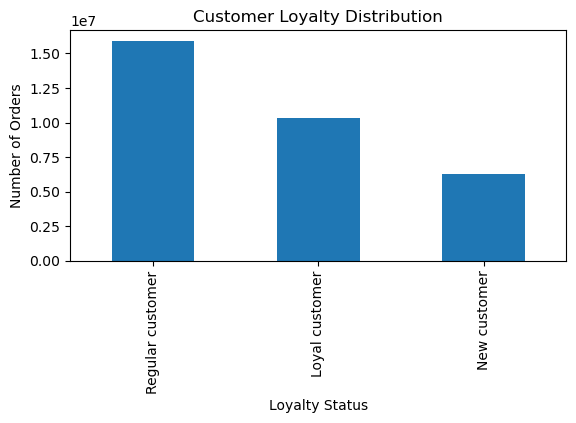

In [100]:
# Create a bar chart to visualize the distribution of orders by 'loyalty_flag'
# This will show how many orders belong to loyal vs non-loyal customers.
bar2 = merged_data['loyalty_flag'].value_counts().plot.bar()
# Set title and labels for the chart
bar2.set(title='Customer Loyalty Distribution', xlabel='Loyalty Status', ylabel='Number of Orders')
# Adjust the layout to give more space at the bottom
plt.subplots_adjust(bottom=0.4)
# Display the chart
plt.show()

In [102]:
# Save the bar chart as a PNG image
# The file is saved in the 'Visualizations' folder within the '04 Analysis' directory at the specified path.
bar2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty_flag.png'))

### Line Plot: Orders by Loyalty Status Across Hours of the Day

<Figure size 1000x500 with 0 Axes>

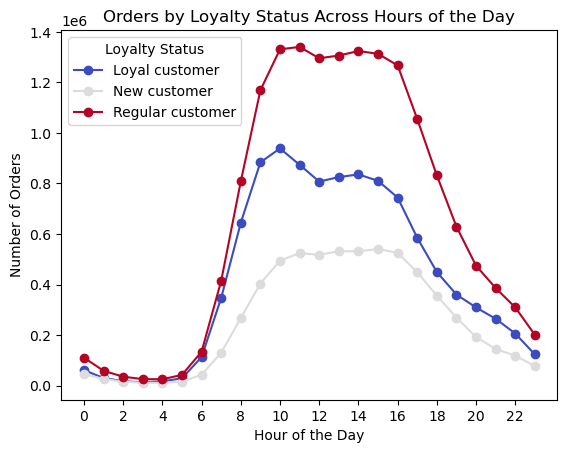

In [7]:
# Count of orders by loyalty status and hour of the day
loyalty_orders_by_hour = merged_data.groupby(['order_hour_of_day', 'loyalty_flag'])['order_id'].count().unstack()

# Plot
plt.figure(figsize=(10, 5))
loyalty_orders_by_hour.plot(kind='line', marker='o', colormap='coolwarm')

# Labels and title
plt.title('Orders by Loyalty Status Across Hours of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.xticks(range(0, 24, 2))  # Show every 2-hour interval for clarity
plt.legend(title='Loyalty Status')

# Save the plot
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'orders_loyaltystatu_day.png'))

# Show the plot
plt.show()


### Bar Chart: Orders by Loyalty Status Across Days of the Week

<Figure size 1000x500 with 0 Axes>

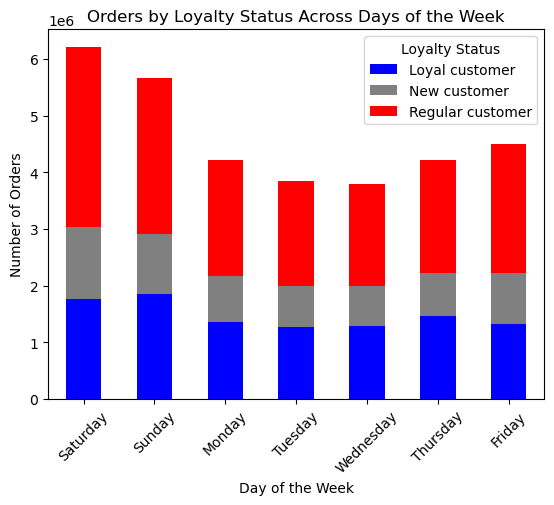

In [25]:
# Define mapping for day of the week (0 = Saturday, 1 = Sunday, ..., 6 = Friday)
day_mapping = {0: 'Saturday', 1: 'Sunday', 2: 'Monday', 3: 'Tuesday', 
               4: 'Wednesday', 5: 'Thursday', 6: 'Friday'}

# Count of orders by loyalty status and day of the week
loyalty_orders_by_day = merged_data.groupby(['order_dow', 'loyalty_flag'])['order_id'].count().unstack()

# Rename index (day numbers → day names)
loyalty_orders_by_day.index = loyalty_orders_by_day.index.map(day_mapping)

# Define custom colors: Regular (Red), Loyal (Blue), New (Gray)
custom_colors = {'Regular customer': 'red', 'Loyal customer': 'blue', 'New customer': 'gray'}

# Plot
plt.figure(figsize=(10, 5))
loyalty_orders_by_day.plot(kind='bar', stacked=True, color=custom_colors)

# Labels and title
plt.title('Orders by Loyalty Status Across Days of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.legend(title='Loyalty Status')

# Save the plot
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'orders_loyaltystatu_week.png'))

# Show the plot
plt.show()

## Step 5

In [94]:
# Step 1: Set the random seed for reproducibility
np.random.seed(4)
# Step 2: Create a random 70-30 split (70% for 'big' and 30% for 'small')
dev1 = np.random.rand(len(merged_data)) <= 0.7
big1 = merged_data[dev1]
small1 = merged_data[~dev1]

In [96]:
# Step 3: Select relevant columns ('order_hour_of_day' and 'prices') for the line plot
df_3 = small1[['order_hour_of_day', 'prices']]

[Text(0.5, 1.0, 'Average Expenditure by Hour of Day'),
 Text(0.5, 0, 'Hour of Day'),
 Text(0, 0.5, 'Average Prices')]

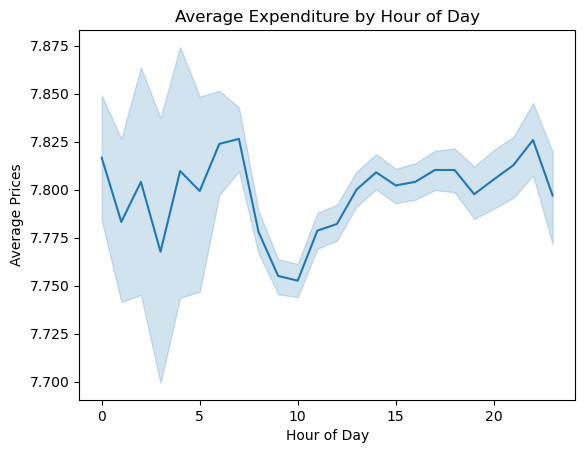

In [100]:
# Step 4: Create a line plot to visualize the average expenditure by hour of the day
line1 = sns.lineplot(data=df_3, x='order_hour_of_day', y='prices')
line1.set(title='Average Expenditure by Hour of Day', xlabel='Hour of Day', ylabel='Average Prices')

In [102]:
# Save the line chart as a PNG image
# The file is saved in the 'Visualizations' folder within the '04 Analysis' directory at the specified path.
line1.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_avg_expend.png'))

### Total Spending by Department and Hour of Day

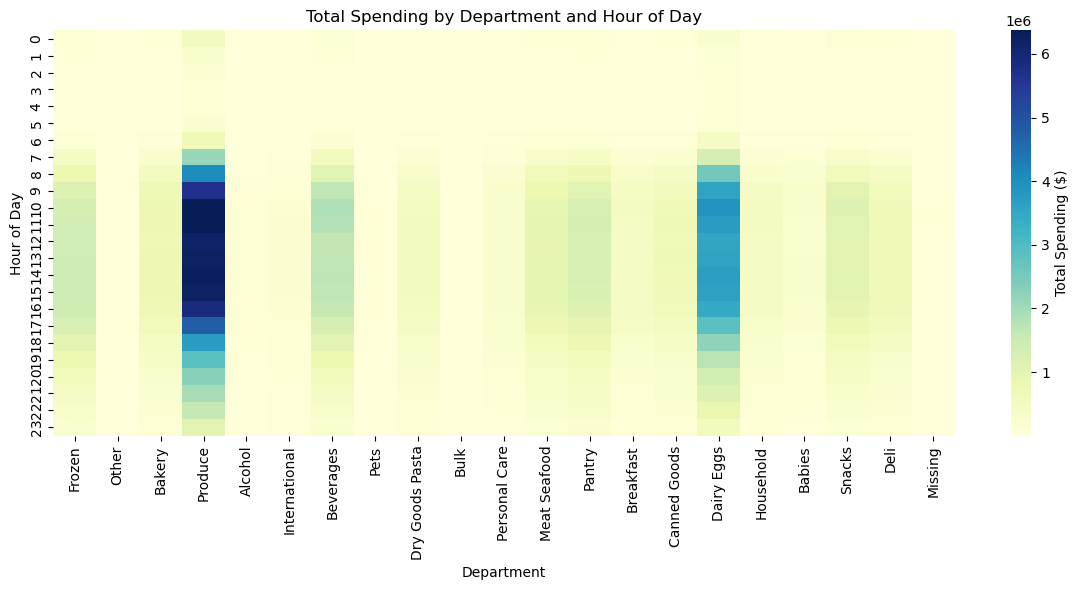

In [35]:
# Mapping department IDs to their respective names
department_mapping = {
    1: 'Frozen', 2: 'Other', 3: 'Bakery', 4: 'Produce', 5: 'Alcohol', 6: 'International', 
    7: 'Beverages', 8: 'Pets', 9: 'Dry Goods Pasta', 10: 'Bulk', 11: 'Personal Care', 
    12: 'Meat Seafood', 13: 'Pantry', 14: 'Breakfast', 15: 'Canned Goods', 16: 'Dairy Eggs', 
    17: 'Household', 18: 'Babies', 19: 'Snacks', 20: 'Deli', 21: 'Missing'
}

# Assuming merged_data contains the relevant columns: 'order_hour_of_day', 'department_id', 'prices'

# Group the data by 'order_hour_of_day' and 'department_id' to calculate total spending per department per hour
department_time_spend = merged_data.groupby(['order_hour_of_day', 'department_id'])['prices'].sum().unstack().fillna(0)

# Replace department_id with department names using the mapping
department_time_spend.columns = department_time_spend.columns.map(department_mapping)

# Create the heatmap visualization without annotations inside the squares
plt.figure(figsize=(12, 6))
sns.heatmap(department_time_spend, annot=False, cmap='YlGnBu', cbar_kws={'label': 'Total Spending ($)'})
plt.title('Total Spending by Department and Hour of Day')
plt.ylabel('Hour of Day')
plt.xlabel('Department')
plt.xticks(rotation=90)
plt.tight_layout()
# Save the plot as a PNG file
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'spend_dep_hour_day.png'))
plt.show()

### Total Spending by Department and Price Range'

/var/folders/nw/29vt6gbs1rl2kd67ggkxdc7h0000gn/T/ipykernel_13925/1201897605.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  department_price_range_spending = merged_data.groupby(['department_name', 'price_range'])['prices'].sum().unstack()


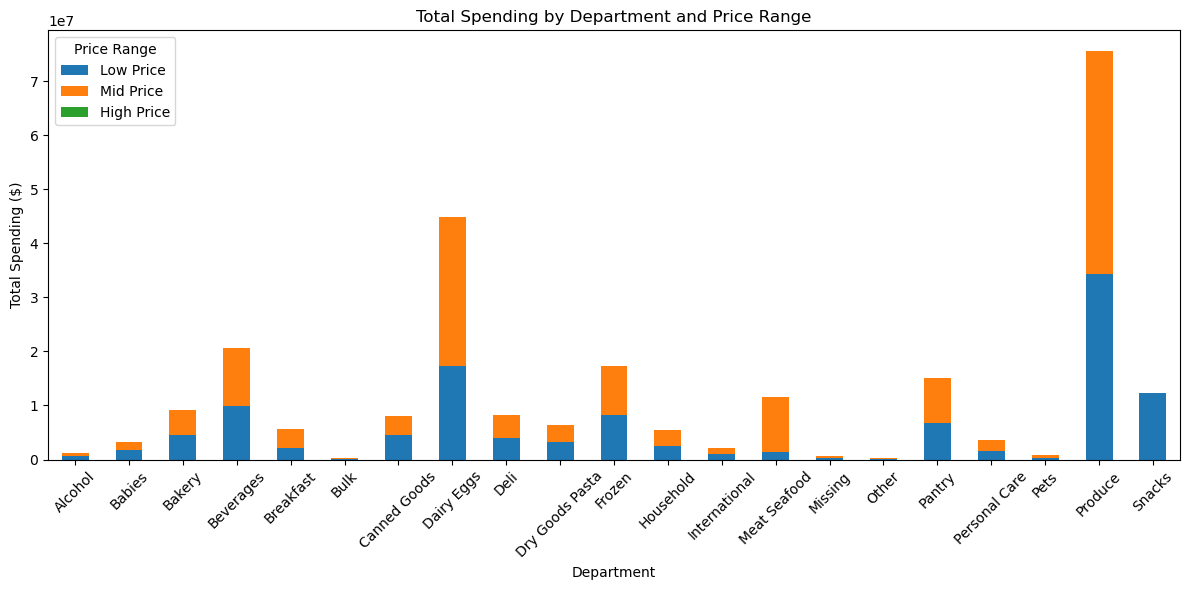

In [62]:
# Mapping department IDs to their respective names
department_mapping = {
    1: 'Frozen', 2: 'Other', 3: 'Bakery', 4: 'Produce', 5: 'Alcohol', 6: 'International', 
    7: 'Beverages', 8: 'Pets', 9: 'Dry Goods Pasta', 10: 'Bulk', 11: 'Personal Care', 
    12: 'Meat Seafood', 13: 'Pantry', 14: 'Breakfast', 15: 'Canned Goods', 16: 'Dairy Eggs', 
    17: 'Household', 18: 'Babies', 19: 'Snacks', 20: 'Deli', 21: 'Missing'
}

# Define price ranges for segmentation
price_bins = [0, 10, 100, float('inf')]  # Low: 0-10, Mid: 10-100, High: 100+
price_labels = ['Low Price', 'Mid Price', 'High Price']

# Create a new column for price segments using pd.cut
merged_data['price_range'] = pd.cut(merged_data['prices'], bins=price_bins, labels=price_labels, right=False)

# Replace department_id with department names
merged_data['department_name'] = merged_data['department_id'].map(department_mapping)

# Price Range vs. Department Spending (Using Department Names)
department_price_range_spending = merged_data.groupby(['department_name', 'price_range'])['prices'].sum().unstack()

# Plot total spending by department and price range
department_price_range_spending.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Total Spending by Department and Price Range')
plt.xlabel('Department')
plt.ylabel('Total Spending ($)')
plt.xticks(rotation=45)
plt.legend(title='Price Range')
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'spend_dep_price.png'))
plt.show()


### Product Distribution by Price Category

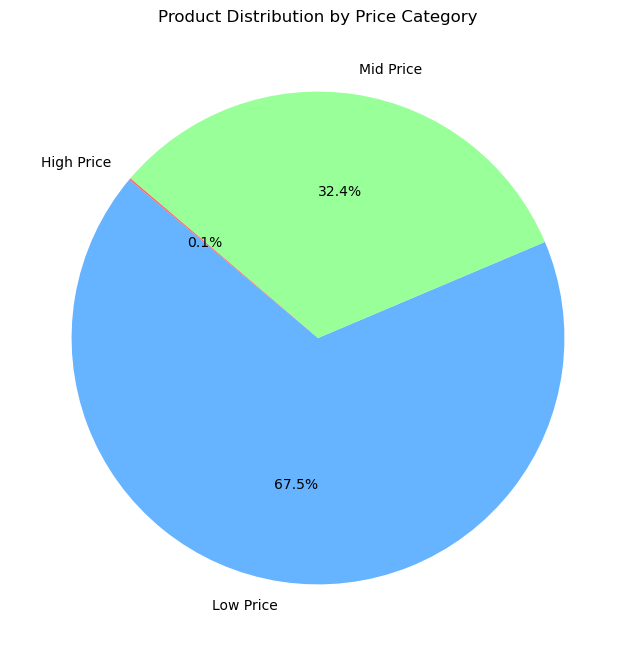

In [58]:
# Define price categories based on price ranges
def categorize_price(price):
    if price <= 10:
        return 'Low Price'
    elif price <= 100:
        return 'Mid Price'
    else:
        return 'High Price'

# Create a new column for price category
merged_data['price_category'] = merged_data['prices'].apply(categorize_price)

# Calculate the percentage of products in each price category
price_category_counts = merged_data['price_category'].value_counts()

# Plotting the pie chart for price category distribution
plt.figure(figsize=(8, 8))
plt.pie(price_category_counts, labels=price_category_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#99ff99','#ff6666'])
plt.title('Product Distribution by Price Category')

# Save the pie chart as a PNG file
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'prod_dist_price.png'))
# Show the pie
plt.show()

### Product Popularity and Order Frequency by Department

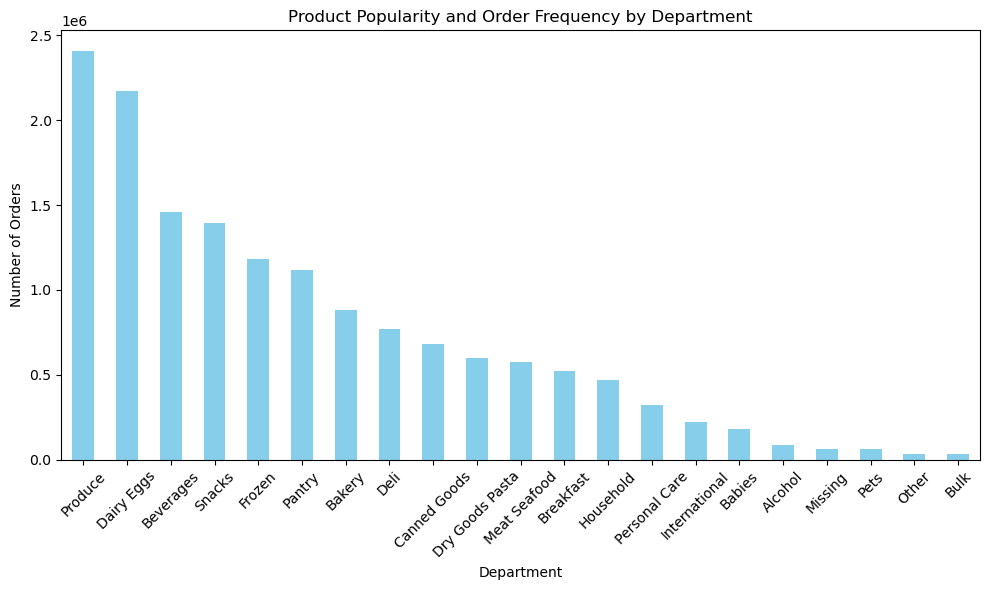

In [70]:
# Mapping department IDs to their respective names
department_mapping = {
    1: 'Frozen', 2: 'Other', 3: 'Bakery', 4: 'Produce', 5: 'Alcohol', 6: 'International', 
    7: 'Beverages', 8: 'Pets', 9: 'Dry Goods Pasta', 10: 'Bulk', 11: 'Personal Care', 
    12: 'Meat Seafood', 13: 'Pantry', 14: 'Breakfast', 15: 'Canned Goods', 16: 'Dairy Eggs', 
    17: 'Household', 18: 'Babies', 19: 'Snacks', 20: 'Deli', 21: 'Missing'
}

# Replace department_id with department names
merged_data['department_name'] = merged_data['department_id'].map(department_mapping)

# Group by department_name and count the frequency of orders (assuming 'order_id' is the unique identifier for orders)
department_order_frequency = merged_data.groupby('department_name')['order_id'].nunique()

# Sort by the number of orders in descending order
department_order_frequency = department_order_frequency.sort_values(ascending=False)

# Plotting the bar chart for order frequency by department
plt.figure(figsize=(10, 6))
department_order_frequency.plot(kind='bar', color='skyblue')
plt.title('Product Popularity and Order Frequency by Department')
plt.xlabel('Department')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'prod_freq_dep.png'))
plt.show()

## Step 6

In [119]:
# Step 1: Set the random seed for reproducibility
np.random.seed(4)
# Step 2: Sample a portion of the data to ensure accuracy in analysis
dev3 = np.random.rand(len(merged_data)) <= 0.7
big3 = merged_data[dev3]
small3 = merged_data[~dev3]

[Text(0.5, 1.0, 'Age and Family Situation vs Number of Dependents'),
 Text(0.5, 0, 'Age'),
 Text(0, 0.5, 'Number of Dependents')]

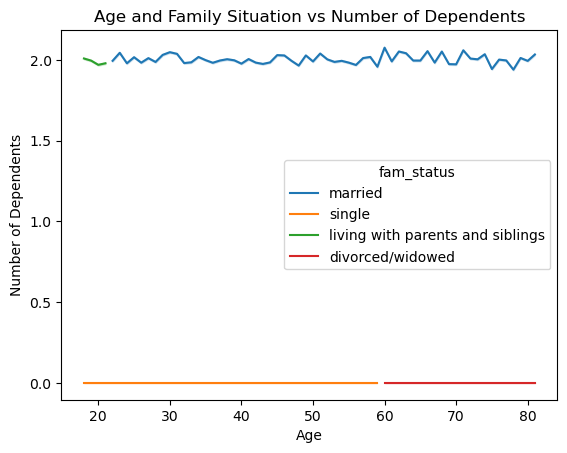

In [121]:
# Step 3: Select relevant columns ('age', 'n_dependants', and 'fam_status') for analysis
df_4 = small3[['age', 'n_dependants', 'fam_status']]
# Step 4: Create a line plot to explore the connection between age, number of dependents, and family situation
line2 = sns.lineplot(data=df_4, x='age', y='n_dependants', hue='fam_status')
line2.set(title='Age and Family Situation vs Number of Dependents', xlabel='Age', ylabel='Number of Dependents')

### Findings on Relationship Between Age and Family Situation (Number of Dependents)

The line chart illustrates the relationship between age, family situation (`fam_status`), and the number of dependents (`n_dependants`). Key observations from the chart include:  

1. **Married Individuals** (Blue Line):  
   - The majority of married individuals consistently have around **2 dependents** across different age groups.  
   - There are minor fluctuations but no significant change in the number of dependents as they age.  

2. **Single Individuals** (Orange Line):  
   - The number of dependents remains at **zero** throughout all age groups, indicating that single individuals generally do not have dependents.  

3. **Living with Parents and Siblings** (Green Line):  
   - This group starts with an average of **about 2 dependents** at younger ages, but the data points are sparse, making it difficult to identify a clear trend.  

4. **Divorced/Widowed Individuals** (Red Line):  
   - Most divorced/widowed individuals also have **zero dependents**, with some data points appearing after age 60, suggesting that individuals in this category are often older and without dependents.  

### Conclusion:  
- The number of dependents is **highly correlated** with marital status, with married individuals having the most dependents.  
- Single and divorced/widowed individuals generally have **no dependents**.  
- The trend remains **stable** across different age groups, with no significant changes in the number of dependents as people age.  
- This information can be valuable for marketing strategies targeting families or individuals with dependents.  

In [123]:
# Save the line chart as a PNG image
# The file is saved in the 'Visualizations' folder within the '04 Analysis' directory at the specified path.
line2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_age_num_dep.png'))

### Impact of Age and Family Status on Ordering Habits

<Figure size 1000x600 with 0 Axes>

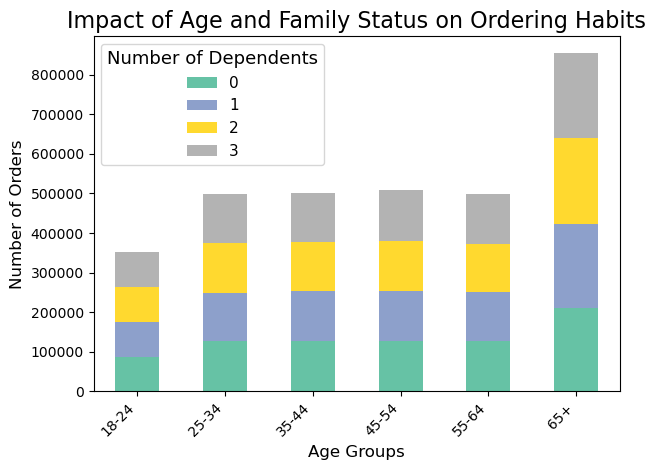

In [16]:
# Manually create the age group column based on predefined ranges
def categorize_age(age):
    if age >= 18 and age < 25:
        return '18-24'
    elif age >= 25 and age < 35:
        return '25-34'
    elif age >= 35 and age < 45:
        return '35-44'
    elif age >= 45 and age < 55:
        return '45-54'
    elif age >= 55 and age < 65:
        return '55-64'
    else:
        return '65+'

# Apply the function to create the 'age_group' column
merged_data['age_group'] = merged_data['age'].apply(categorize_age)

# Group by the new age_group and n_dependants, then count the number of unique orders
order_counts = merged_data.groupby(['age_group', 'n_dependants']).agg(order_count=('order_id', 'nunique')).reset_index()

# Pivot the table to get the number of orders for each family status (n_dependants) in each age group
pivot_data = order_counts.pivot_table(index='age_group', columns='n_dependants', values='order_count', aggfunc='sum', fill_value=0)

# Plotting the stacked bar chart
plt.figure(figsize=(10, 6))
pivot_data.plot(kind='bar', stacked=True, colormap='Set2')

# Adding labels and title
plt.title('Impact of Age and Family Status on Ordering Habits', fontsize=16)
plt.xlabel('Age Groups', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Number of Dependents', title_fontsize='13', fontsize='11')

# Display the plot
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_fam_ordering.png'))
plt.show()

## Step 7

[Text(0.5, 1.0, 'Relationship Between Age and Income'),
 Text(0.5, 0, 'Age'),
 Text(0, 0.5, 'Income')]

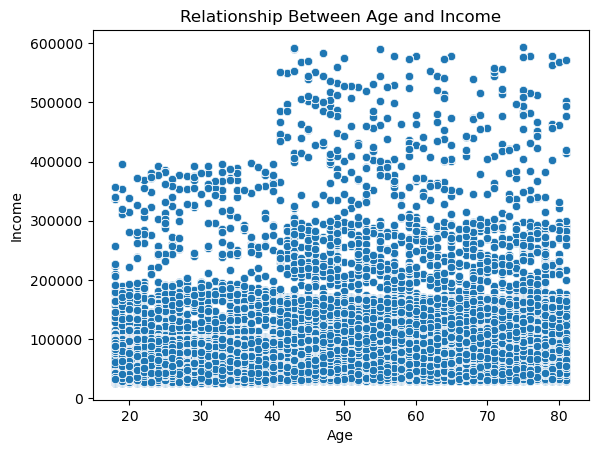

In [7]:
# Create a scatterplot to visualize the relationship between age and income
scatter_plot = sns.scatterplot(data=merged_data, x='age', y='income')
# Set the chart title and axis labels
scatter_plot.set(title='Relationship Between Age and Income', xlabel='Age', ylabel='Income')

### Findings on Relationship Between Age and Income

The scatterplot visualizes the relationship between **age** and **income**, revealing the following insights:  

1. **General Distribution**:  
   - Income levels are widely distributed across all age groups.  
   - A significant number of individuals fall within the **lower-income range (under 200,000)**, regardless of age.  

2. **Higher-Income Individuals**:  
   - Higher income levels (above 300,000) appear more frequently **after the age of 40**.  
   - There is a noticeable concentration of high-income individuals between **ages 40 and 70**, suggesting that income tends to increase with career progression and experience.  

3. **Income Ceiling Effect**:  
   - A **sharp increase in income** is visible around the **mid-40s and beyond**, with some individuals earning over 500,000.  
   - Younger individuals (<40) rarely have very high incomes, which is expected as they are likely in early career stages.  

### Conclusion:  
- **Income generally increases with age** but remains varied across different age groups.  
- Younger individuals tend to have **lower income**, while high-income individuals are predominantly in the **40+ age range**.  
- This insight is valuable for **targeted marketing strategies**, allowing businesses to adjust their campaigns based on income levels and spending power across different age groups.  


In [9]:
# Save the scatter plot as a PNG image
# The file is saved in the 'Visualizations' folder within the '04 Analysis' directory at the specified path.
scatter_plot.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'sc_age_income.png'))